<a href="https://colab.research.google.com/github/MosheAmitay/sklearn_notebooks/blob/main/Medical_Cost_Personal_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/krish1407/Medical-Cost-Personal-Datasets/master/insurance.csv")
df.describe()
df.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


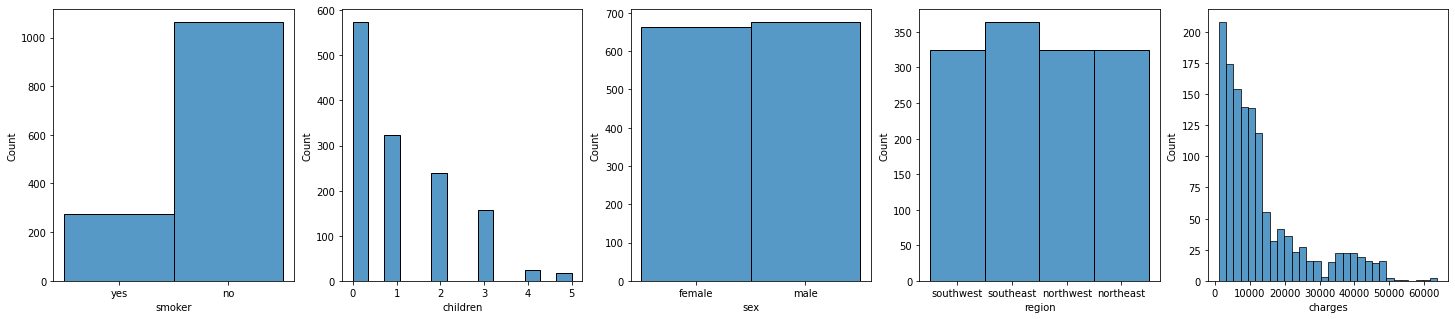

(1338, 7)


In [3]:
fig, axes = plt.subplots(ncols=5,figsize=(25, 5))
sns.histplot(ax=axes[0],data=df, x="smoker")
sns.histplot(ax=axes[1],data=df, x="children")
sns.histplot(ax=axes[2],data=df, x="sex")
sns.histplot(ax=axes[3],data=df, x="region")
sns.histplot(ax=axes[4],data=df, x="charges")
plt.show()

print(df.shape)

In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os,sys
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit,StratifiedKFold,cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score,recall_score,accuracy_score,precision_score
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn import datasets
from sklearn.utils import shuffle

In [6]:
categorical = df.select_dtypes(include='object').columns	
numerical = df.select_dtypes(include=np.number).columns	

df[numerical]

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
import xgboost as xg
from sklearn.preprocessing import RobustScaler

X = df.drop(["charges"],axis = 1)
y = df["charges"]


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)


print("X_train.shape",X_train.shape)
X_train = pd.DataFrame(X_train,columns=X.columns)
X_test = pd.DataFrame(X_test,columns=X.columns)    
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_temp = pd.concat([X_train, y_train], axis=1)


# add more datapoints 10000-35000 to increase their weight
X_temp = pd.concat([X_temp, X_temp[(X_temp['charges'] < 35000) & (X_temp['charges']>10000)]], axis=0, join='outer', ignore_index=True, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)


#print(   X_temp[(X_temp['charges'] < 35000) & (X_temp['charges']>10000)])

X_train = X_temp.drop(["charges"],axis = 1)
y_train = X_temp["charges"]

print("X_train.shape",X_train.shape)


enc = OneHotEncoder()
X_train_categorical = enc.fit_transform(X_train[categorical]).toarray()
X_train_categorical = pd.DataFrame(X_train_categorical)
X_train = X_train.drop(categorical,axis=1)

X_train.reset_index(drop=True, inplace=True)
X_train_categorical.reset_index(drop=True, inplace=True)

X_train = pd.concat([X_train_categorical, X_train], axis=1)

# do encoding in test
X_test_categorical = enc.transform(X_test[categorical]).toarray()
X_test_categorical = pd.DataFrame(X_test_categorical)
X_test = X_test.drop(categorical,axis=1)
X_test.reset_index(drop=True, inplace=True)
X_test_categorical.reset_index(drop=True, inplace=True)
X_test = pd.concat([X_test_categorical, X_test], axis=1)



scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
    


print ("--")

#LinearRegression= MLPRegressor(hidden_layer_sizes=(15,15,5))

LinearRegression= xg.XGBRegressor()
LinearRegression.fit(X_train,y_train)

y_pred=LinearRegression.predict(X_test)

print(mean_absolute_error(y_test, y_pred))






X_train.shape (1070, 6)
X_train.shape (1464, 6)
--
[14:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3044.5172267509615


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


4848.621711605846
3044.5172267509615
R2 0.8487892016784355
1192    13019.16105
1165     5227.98875
65       1743.21400
398     14988.43200
1332    11411.68500
Name: charges, dtype: float64
[13040.327   7072.043   2845.8804 15109.59   11469.6   ]


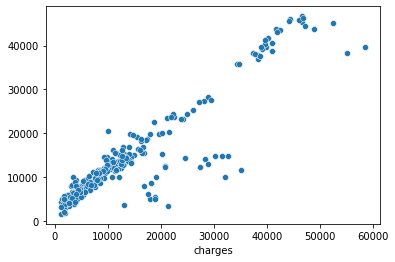

In [19]:
sns.scatterplot( x=y_test, y=y_pred)
from sklearn.metrics import mean_squared_error,r2_score
import math
print(math.sqrt(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))
print("R2", r2_score(y_test, y_pred))
print(y_test[0:5])
print(y_pred[0:5])